<div style="color:#483838; padding:0px 10px; border-radius:5px; font-size:18px; text-align:center"><h1 style='margin:10px 5px'>Categorical Values</h1>
</div>

- __01)import data and EDA__
- __02)Data separation__
- __03)apply Label encoder on caregorical data__
- __04)apply one_hot_encoding__

## 01)import data and EDA

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
data_raw  = pd.read_csv("G:\\Data_analyst\\05)data prepration\\heart.csv")
data = data_raw.copy()    #make a copy in order to compare data

__Data Exploratory__

In [61]:
data_raw.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [62]:
data_raw.shape

(918, 12)

In [63]:
data_raw.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 02)Data separation

- We use  **LabelEncoder**  from **Sklearn** to do One Hot Encoding.

- First we should chunk our data columns into **numbers**, **objects** and **Labels** using **select_dtypes**.
- Let's check the kinds of data we have:

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [65]:
data_categorical = data.select_dtypes("object")
data_number = data.select_dtypes("int64","float64")
data_label = data.iloc[:,-1]

## 03)apply Label encoder on caregorical data

- we apply Label Encoder to label all categorical data with a specific number.

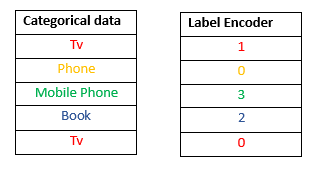

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
label_enc = LabelEncoder()

In [68]:
data_categorical = data_categorical.apply(label_enc.fit_transform)

In [69]:
# Now we let that columns which contain 0 and 1 to be remained untouched.
# we use unique to determine columns with 0 and 1 numbers.
#Those columns which shows only 2 unique number consited of 0 and 1.

In [70]:
data_categorical.nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

- Separating columns with 0 and 1 values.

In [71]:
data_bin = data_categorical[["Sex","ExerciseAngina"]]

In [72]:
data_bin

,Sex,ExerciseAngina
0,1,0
1,0,0
2,1,0
3,0,1
4,1,0
...,...,...
913,1,0
914,1,0
915,1,1
916,0,0


In [82]:
data_categorical = data_categorical[["ChestPainType","RestingECG","ST_Slope"]]

## 04)apply one_hot_encoding

In [83]:
from sklearn.preprocessing import OneHotEncoder

In [84]:
ohe = OneHotEncoder()

In [85]:
data_ohe = ohe.fit_transform(data_categorical.values).toarray()

In [86]:
print(data_ohe[1,:])

[0. 0. 1. 0. 0. 1. 0. 0. 1. 0.]


In [87]:
#in this step we should combine our separated data(data_bin,data_numeric,data_ohe)

In [91]:
data_final = np.concatenate([data_number.values,data_bin,data_ohe],axis = 1)

In [92]:
pd.DataFrame(data_final)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,40.0,140.0,289.0,0.0,172.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49.0,160.0,180.0,0.0,156.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,130.0,283.0,0.0,98.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48.0,138.0,214.0,0.0,108.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,54.0,150.0,195.0,0.0,122.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,110.0,264.0,0.0,132.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68.0,144.0,193.0,1.0,141.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57.0,130.0,131.0,0.0,115.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
916,57.0,130.0,236.0,0.0,174.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
